# Quantum Phase Estimation (QPE) for H₂ — **Noiseless**

Uses PennyLane with harmonized project utilities

In [1]:
from qpe.core import run_qpe
from qpe.hamiltonian import build_hamiltonian
from qpe.io_utils import ensure_dirs, load_qpe_result, save_qpe_result
from qpe.visualize import plot_qpe_distribution, plot_qpe_sweep

ensure_dirs()


In [2]:
molecule_name = "H2"
seed = 0

H, n_qubits, hf_state, symbols, coordinates, basis, charge = build_hamiltonian(molecule_name)

n_ancilla = 4
t_evol = 1.0
trotter_steps = 2
shots = 1000
noise_params = None  # noiseless

result = load_qpe_result(
    molecule=molecule_name,
    n_ancilla=int(n_ancilla),
    t=float(t_evol),
    seed=int(seed),
    shots=int(shots) if shots is not None else None,
    noise=noise_params,
    trotter_steps=int(trotter_steps),
)

if result is None:
    result = run_qpe(
        hamiltonian=H,
        hf_state=hf_state,
        n_ancilla=int(n_ancilla),
        t=float(t_evol),
        trotter_steps=int(trotter_steps),
        noise_params=noise_params,
        shots=int(shots) if shots is not None else None,
        molecule_name=molecule_name,
    )
    result["system_qubits"] = int(n_qubits)
    result["seed"] = int(seed)
    result["noise"] = noise_params or {}
    save_qpe_result(result)


/home/codespace/.local/lib/python3.12/site-packages/pennylane/devices/device_api.py:193: PennyLaneDeprecationWarning: Setting shots on device is deprecated. Please use the `set_shots` transform on the respective QNode instead.
  warnings.warn(


💾 Saved QPE result → /workspaces/Variational_Quantum_Eigensolver/results/qpe/H2_4ancilla_t1_s0_17a8b19169cd.json


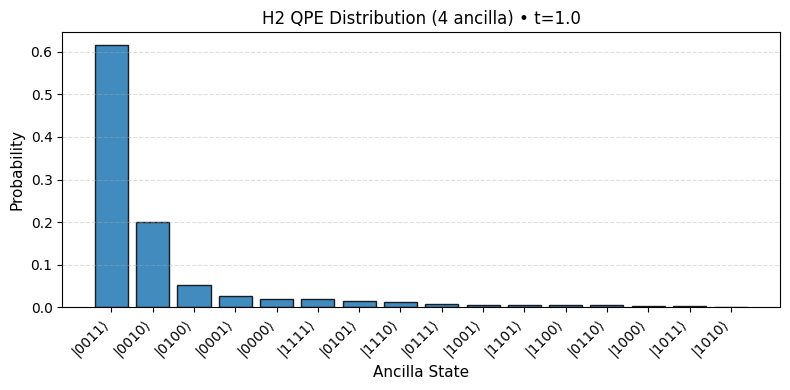

📁 Saved plot → /workspaces/Variational_Quantum_Eigensolver/images/qpe/H2/distribution_ancilla4_t1.png
Most probable bitstring: 0011
Estimated phase: 0.187500
Estimated energy: -1.17809725 Ha
Hartree–Fock energy: -1.11668439 Ha
ΔE (QPE - HF): -0.06141286 Ha


In [3]:
plot_qpe_distribution(result, show=True, save=True)

print(f"Most probable bitstring: {result['best_bitstring']}")
print(f"Estimated phase: {result['phase']:.6f}")
print(f"Estimated energy: {result['energy']:.8f} Ha")
print(f"Hartree–Fock energy: {result['hf_energy']:.8f} Ha")
print(f"ΔE (QPE - HF): {result['energy'] - result['hf_energy']:+.8f} Ha")


💾 Saved QPE result → /workspaces/Variational_Quantum_Eigensolver/results/qpe/H2_3ancilla_t1_s0_487b1934a5b2.json
💾 Saved QPE result → /workspaces/Variational_Quantum_Eigensolver/results/qpe/H2_5ancilla_t1_s0_477050acfd7b.json
💾 Saved QPE result → /workspaces/Variational_Quantum_Eigensolver/results/qpe/H2_6ancilla_t1_s0_56084d007dff.json


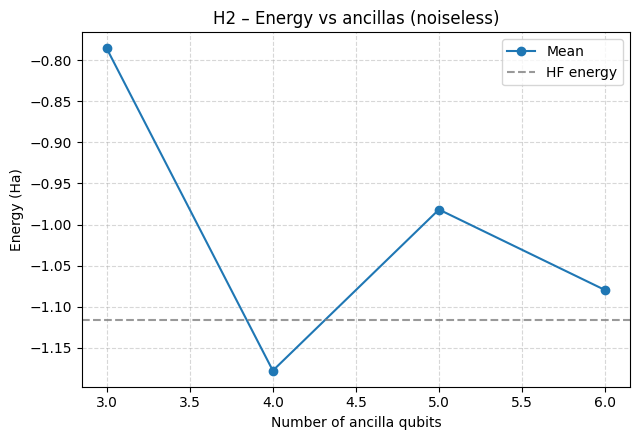

📁 Saved plot → /workspaces/Variational_Quantum_Eigensolver/images/qpe/H2/sweep_energy_vs_ancillas_noiseless.png


In [4]:
# Sweep over number of ancilla qubits (noiseless)
anc_list = [3, 4, 5, 6]
energies = []

for n in anc_list:
    r = load_qpe_result(
        molecule=molecule_name,
        n_ancilla=int(n),
        t=float(t_evol),
        seed=int(seed),
        shots=int(shots) if shots is not None else None,
        noise=None,
        trotter_steps=int(trotter_steps),
    )

    if r is None:
        r = run_qpe(
            hamiltonian=H,
            hf_state=hf_state,
            n_ancilla=int(n),
            t=float(t_evol),
            trotter_steps=int(trotter_steps),
            noise_params=None,
            shots=int(shots) if shots is not None else None,
            molecule_name=molecule_name,
        )
        r["system_qubits"] = int(n_qubits)
        r["seed"] = int(seed)
        r["noise"] = {}
        save_qpe_result(r)

    energies.append(float(r["energy"]))

plot_qpe_sweep(
    anc_list,
    energies,
    molecule=molecule_name,
    sweep_label="Number of ancilla qubits",
    ylabel="Energy (Ha)",
    title="Energy vs ancillas (noiseless)",
    ref_value=result["hf_energy"],
    ref_label="HF energy",
    ancilla=None,
    noise_params=None,
    show=True,
    save=True,
)
